In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import wget

In [30]:
file='InterpolacionNewtonNoequi.csv'
url='https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    Path_ = file

In [31]:
Data = pd.read_csv(Path_,sep=',')
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [32]:
def NewtonGregoryNonEq(X,Y,x):
    Sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(Y)))
    Diff[:,0] = Y

    h = X[1] - X[0]
            
    poly = 1.0
    
    for i in range(1,len(X)):
        
        poly *= ( x - X[i-1] )
        
        for j in range(i, len(X)):
            Diff[j,i] = (Diff[j,i-1]-Diff[j-1,i-1]) / (X[j] - X[j-i])
            
        Sum_ += poly*(Diff[i,i])
    
    return Sum_,np.round(Diff,2)

In [33]:
x = np.linspace(np.min(X),np.max(X),100)
y,mat = NewtonGregoryNonEq(X,Y,x)

In [34]:
mat

array([[-18.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [-13.  ,   3.33,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,  26.  ,  11.33,   0.  ,   0.  ,   0.  ],
       [  5.  ,   2.78, -10.1 ,  -5.64,   0.  ,   0.  ],
       [  3.  ,  -5.  ,  -3.54,   2.43,   1.92,   0.  ],
       [ 10.  ,   4.12,   4.34,   2.02,  -0.09,  -0.34]])

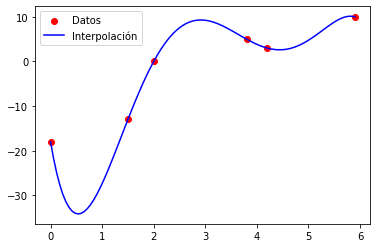

In [35]:
plt.scatter(X,Y,c="r",label="Datos")
plt.plot(x,y,label="Interpolación",color="#0000FF")
plt.legend()

In [36]:
x = sym.Symbol('x',Real='True')
p,_ = NewtonGregoryNonEq(X,Y,x)
p = p.simplify()

In [37]:
#POLINOMIO INTERPOLANTE DE MENOR GRADO
p

-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0